# Let us read multiple csv files, one for each month.
# Then put them all in one single dataframe.

In [5]:
import pandas as pd
pd.set_option('future.no_silent_downcasting', True)
import numpy as np
import matplotlib.pyplot as plt
import itertools

# Is there climate change in the near future?
# Are there more frequent extreme events, like excessive rainfall?
# Anything special during COVID19 years?
# You can look at other quantities like min/max temperatures, etc.

In [6]:
# You are provided with monthly data from January 1980 to January 2025.
# Define the year and month for the names of the csv files. The format is YYYYMM.

# One way is to use range(YYYY01, YYYY13) for all months of that year YYYY.
# The itertools.chain would concatenate all of them into one single list. Print out the list to view it.

# ListOfMonths1 = list(itertools.chain(range(198001, 198013), range(198101, 198113), range(198201, 198213),
#                                      range(198301, 198313), range(198401, 198413), range(198501, 198513),
#                                      range(198601, 198613), range(198701, 198713), range(198801, 198813),
#                                      range(198901, 198913), range(199001, 199013), range(199101, 199113),
#                                      range(199201, 199213), range(199301, 199313), range(199401, 199413),
#                                      range(199501, 199513), range(199601, 199613), range(199701, 199713),
#                                      range(199801, 199813), range(199901, 199913), range(200001, 200013),
#                                      range(200101, 200113), range(200201, 200213), range(200301, 200313),
#                                      range(200401, 200413), range(200501, 200513), range(200601, 200613),
#                                      range(200701, 200713), range(200801, 200813), range(200901, 200913),
#                                      range(201001, 201013), range(201101, 201113), range(201201, 201213),
#                                      range(201301, 201313), range(201401, 201413), range(201501, 201513),
#                                      range(201601, 201613), range(201701, 201713), range(201801, 201813),
#                                      range(201901, 201913), range(202001, 202013), range(202101, 202113),
#                                      range(202201, 202213), range(202301, 202313), range(202401, 202413),
#                                      range(202501, 202502)))

# # Alternatively, this is a nested loop.
# # This uses the built-in string function zfill to append 0 to an integer of desired length.
# # E.g. the integer 1 to become the string '01'.

# ListOfMonths2 = [int(str(YYYY) + str(MM).zfill(2)) for YYYY in range(1980, 2026) for MM in range(1, 13)]

# # Delete February to December of 2025, since we only have January 2025 ...
# ListOfMonths2 = ListOfMonths2[:-11]

# ### Are they the same?
# print(ListOfMonths1 == ListOfMonths2)

# # Okay, let us just use one of them.
# ListOfMonths = ListOfMonths1


In [7]:
#
# # List comprehension to read each csv file with the given YYYYMM, and appending that dataframe into a list.
# # So you have a list of all the data frames for each YYYYMM.
# ListOfDF = [pd.read_csv(f'Raw Data/DAILYDATA_S24_{element}.csv') for element in ListOfMonths]

# # This will create a single dataframe, concatenating all of them.
# df = pd.concat(ListOfDF)

# # Replace '—' and '-' with NaN.
# df.replace(['—', '-'], np.NaN, inplace=True)

# # Let us take a look at your combined (rather, concatenated) dataframe!

filename = "Part B/processed_data.csv"
df = pd.read_csv(filename)  # Assuming you have saved the concatenated dataframe as 'alldata.csv'
df

,Station,Year,Month,Day,Daily Rainfall Total (mm),Highest 30 Min Rainfall (mm),Highest 60 Min Rainfall (mm),Highest 120 Min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
0,Changi,1980,4,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Changi,1980,4,2,71.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Changi,1980,4,3,3.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Changi,1980,4,4,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Changi,1980,4,5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13689,Changi,2025,1,27,11.0,3.6,4.4,6.4,25.3,29.5,23.2,12.9,40.7
13690,Changi,2025,1,28,0.0,0.0,0.0,0.0,26.6,29.6,25.3,20.7,51.9
13691,Changi,2025,1,29,0.0,0.0,0.0,0.0,26.4,29.2,24.9,20.1,57.4
13692,Changi,2025,1,30,0.0,0.0,0.0,0.0,26.6,30.3,24.1,17.1,51.9


# We are dealing with time series. Let us set our datetime index.

In [8]:
# Let us create a datetime object using the year, month and day columns, and set that as the index of the dataframe.
df.set_index(pd.to_datetime(df[['Year', 'Month', 'Day']]), inplace=True)

# As a start, let us investigate these three quantities.
df = df[['Daily Rainfall Total (mm)', 'Mean Temperature (°C)', 'Mean Wind Speed (km/h)']]

# Set data types as float.
# Otherwise the "-" values replaced by "NaN" may make the data type as non-numeric and cannot be plotted.
df = df.astype(float)

# Only run this cell once.
# If you run it again, df no longer has the year, month and date columns to set the index ...

# Let us print out our simpler and better organised dataframe!
df

,Daily Rainfall Total (mm),Mean Temperature (°C),Mean Wind Speed (km/h)
1980-04-01,0.0,NaN,NaN
1980-04-02,71.2,NaN,NaN
1980-04-03,3.6,NaN,NaN
1980-04-04,0.4,NaN,NaN
1980-04-05,0.0,NaN,NaN
...,...,...,...
2025-01-27,11.0,25.3,12.9
2025-01-28,0.0,26.6,20.7
2025-01-29,0.0,26.4,20.1
2025-01-30,0.0,26.6,17.1


# <i><b><s>Very basic</s></b></i> EDA.

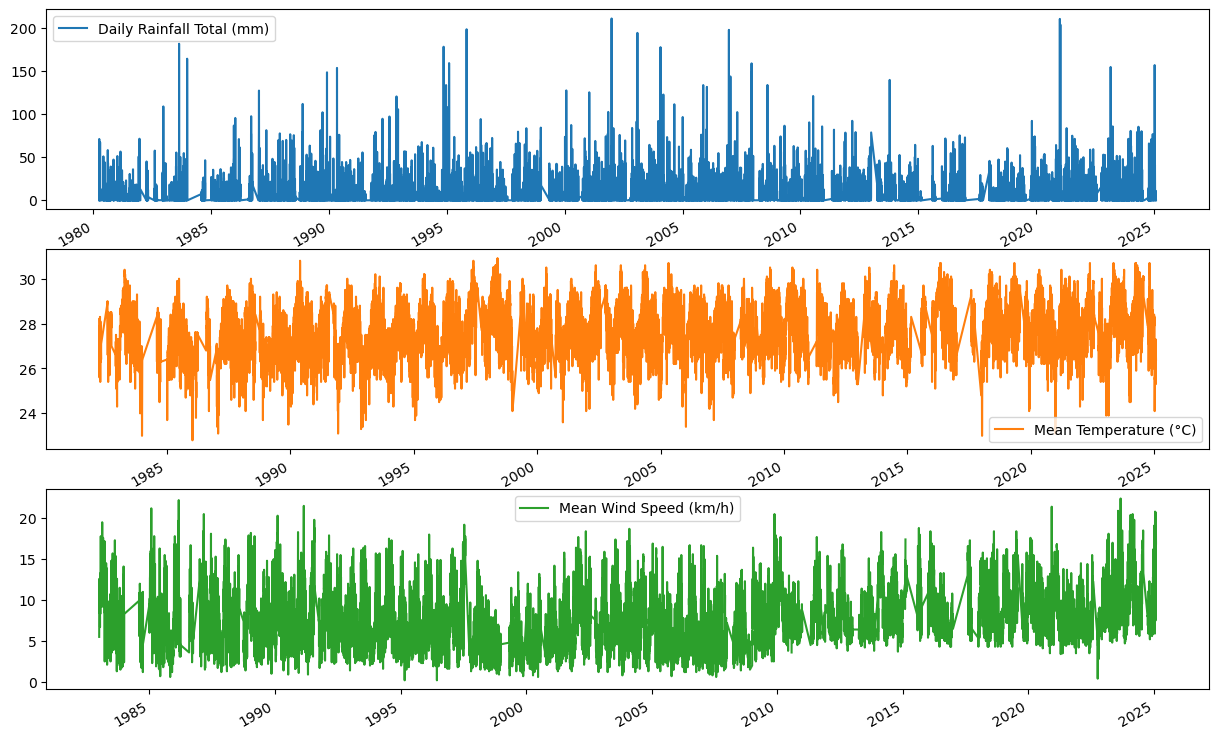

In [9]:
# Some plots of the raw data.

fig, ax = plt.subplots(3, 1, figsize=(15, 10))

df[['Daily Rainfall Total (mm)']].plot(ax=ax[0])
df[['Mean Temperature (°C)']].plot(ax=ax[1], c='C1')
df[['Mean Wind Speed (km/h)']].plot(ax=ax[2], c='C2')
plt.show()

In [10]:
# How about resampling, would that smoothen out the fluctuations?
# Or how about looking within a smaller time frame?

# Let us try smaller time frame first, this is easier.



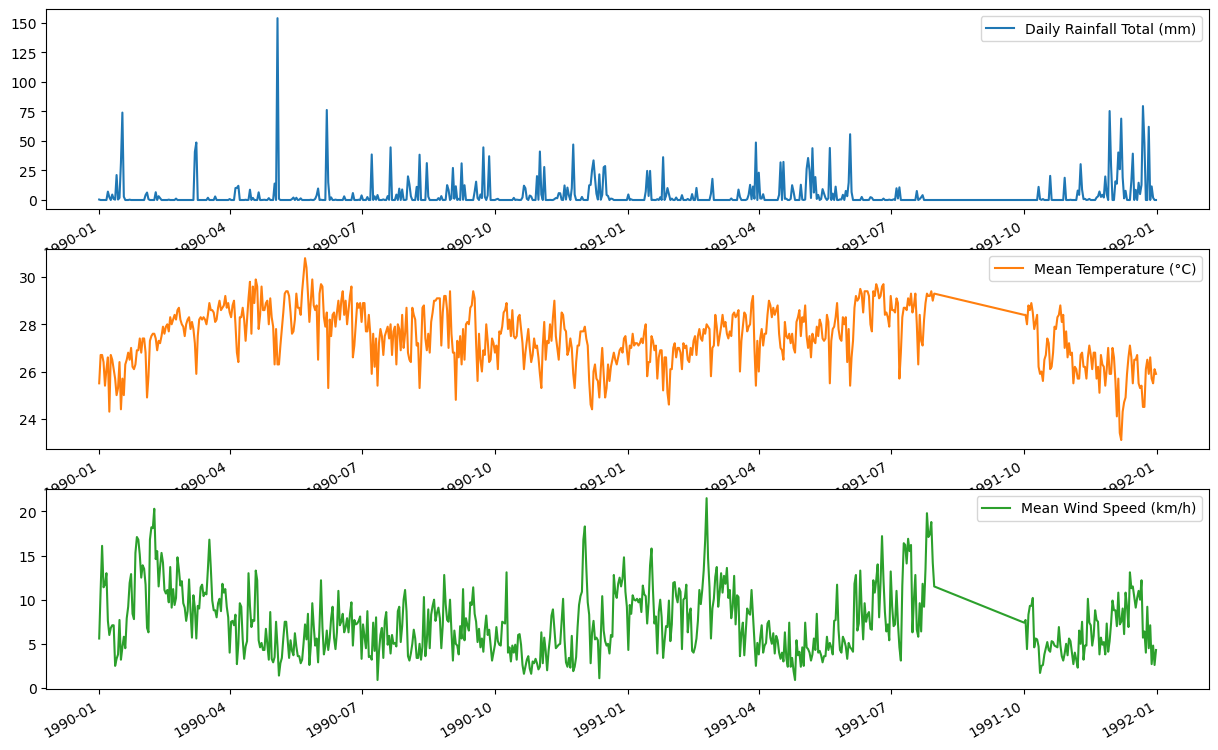

In [11]:
# Just one year.

fig, ax = plt.subplots(3, 1, figsize=(15, 10))

# please remember ISO format yyyy-mm-dd for the dates for auto convertion
df[['Daily Rainfall Total (mm)']]['1990':'1991'].plot(ax=ax[0])
df[['Mean Temperature (°C)']]['1990':'1991'].plot(ax=ax[1], c='C1')
df[['Mean Wind Speed (km/h)']]['1990':'1991'].plot(ax=ax[2], c='C2')
plt.show()

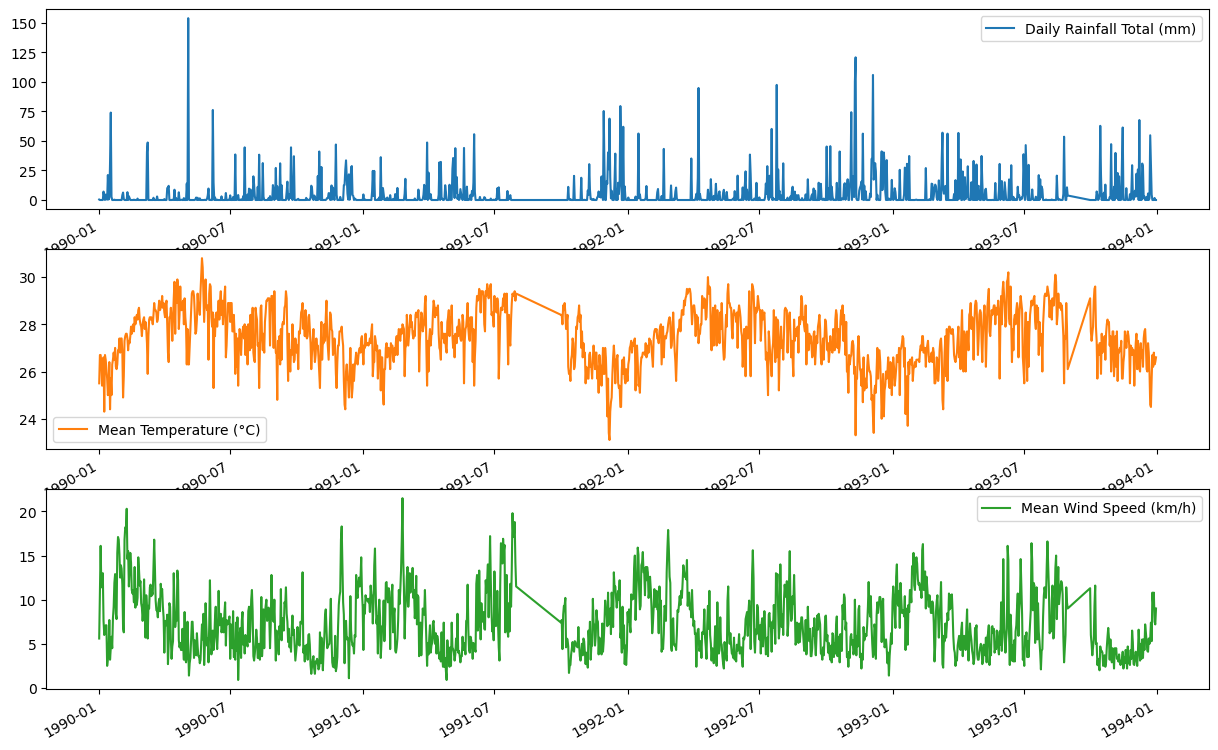

In [12]:
# How about over four years?
# Maybe ENSO? La Nini, El Nino southern oscillation? How often do they recur?

fig, ax = plt.subplots(3, 1, figsize=(15, 10))

df[['Daily Rainfall Total (mm)']]['1990':'1993'].plot(ax=ax[0])
df[['Mean Temperature (°C)']]['1990':'1993'].plot(ax=ax[1], c='C1')
df[['Mean Wind Speed (km/h)']]['1990':'1993'].plot(ax=ax[2], c='C2')
plt.show()

In [13]:
# So ... any insights?

# Fine, time for resampling.

In [14]:
df_weekly = df.resample('W').mean()
df_monthly = df.resample('ME').mean()

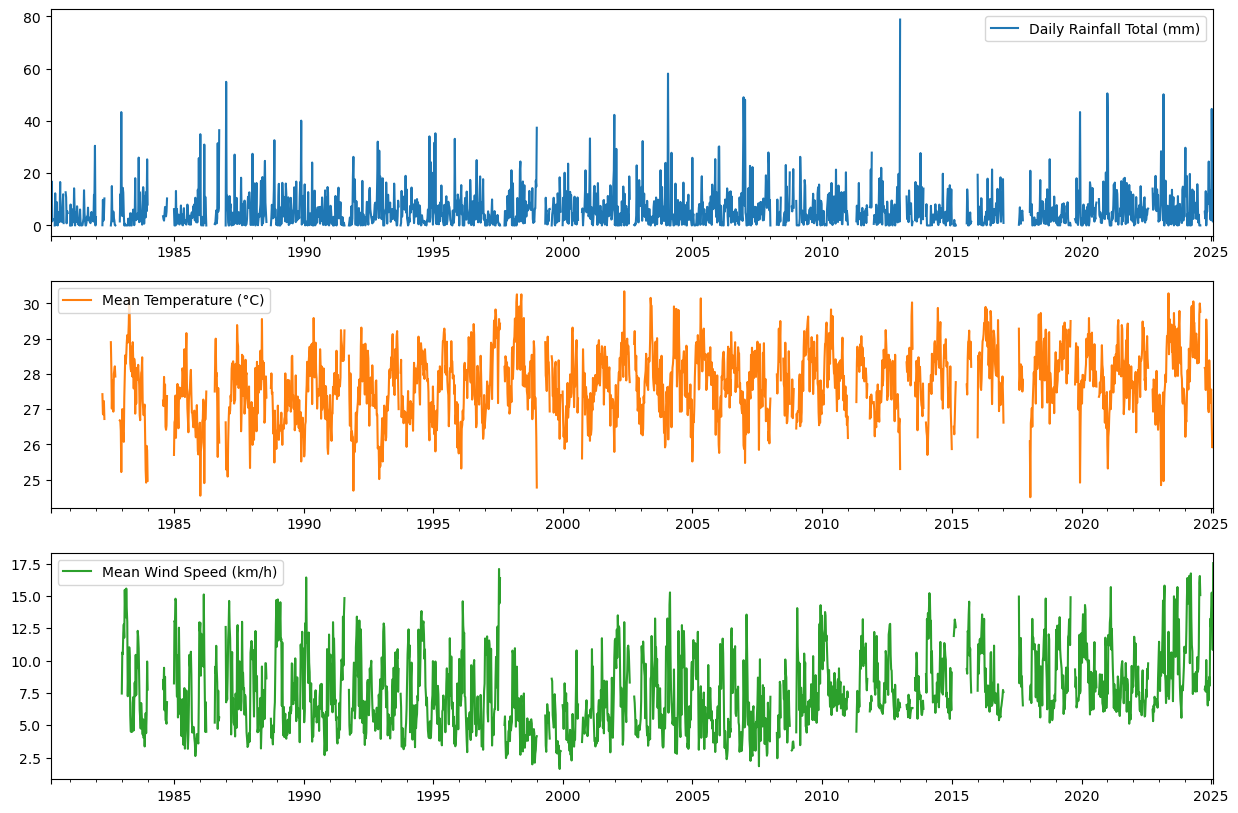

In [15]:
fig, ax = plt.subplots(3, 1, figsize=(15, 10))

df_weekly[['Daily Rainfall Total (mm)']].plot(ax=ax[0])
df_weekly[['Mean Temperature (°C)']].plot(ax=ax[1], c='C1')
df_weekly[['Mean Wind Speed (km/h)']].plot(ax=ax[2], c='C2')
plt.show()

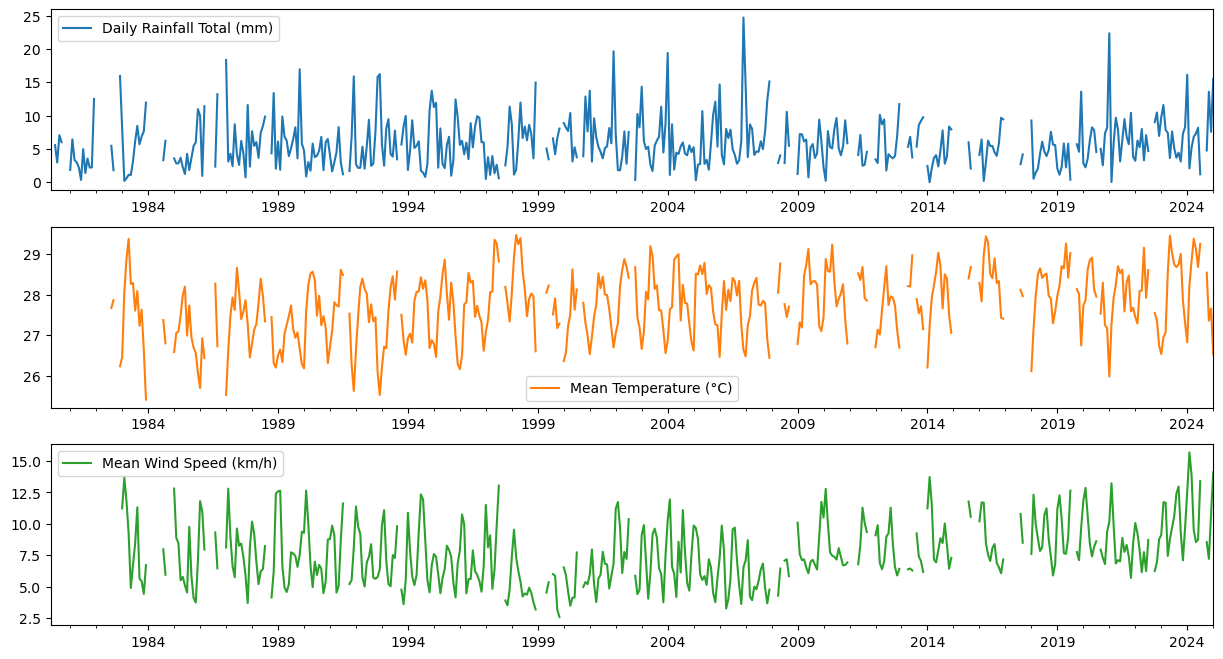

In [16]:
fig, ax = plt.subplots(3, 1, figsize=(15, 8))

df_monthly[['Daily Rainfall Total (mm)']].plot(ax=ax[0])
df_monthly[['Mean Temperature (°C)']].plot(ax=ax[1], c='C1')
df_monthly[['Mean Wind Speed (km/h)']].plot(ax=ax[2], c='C2')
plt.show()

# Bonus ... taking diff of rainfall and plotting it ... visual check of stationarity.

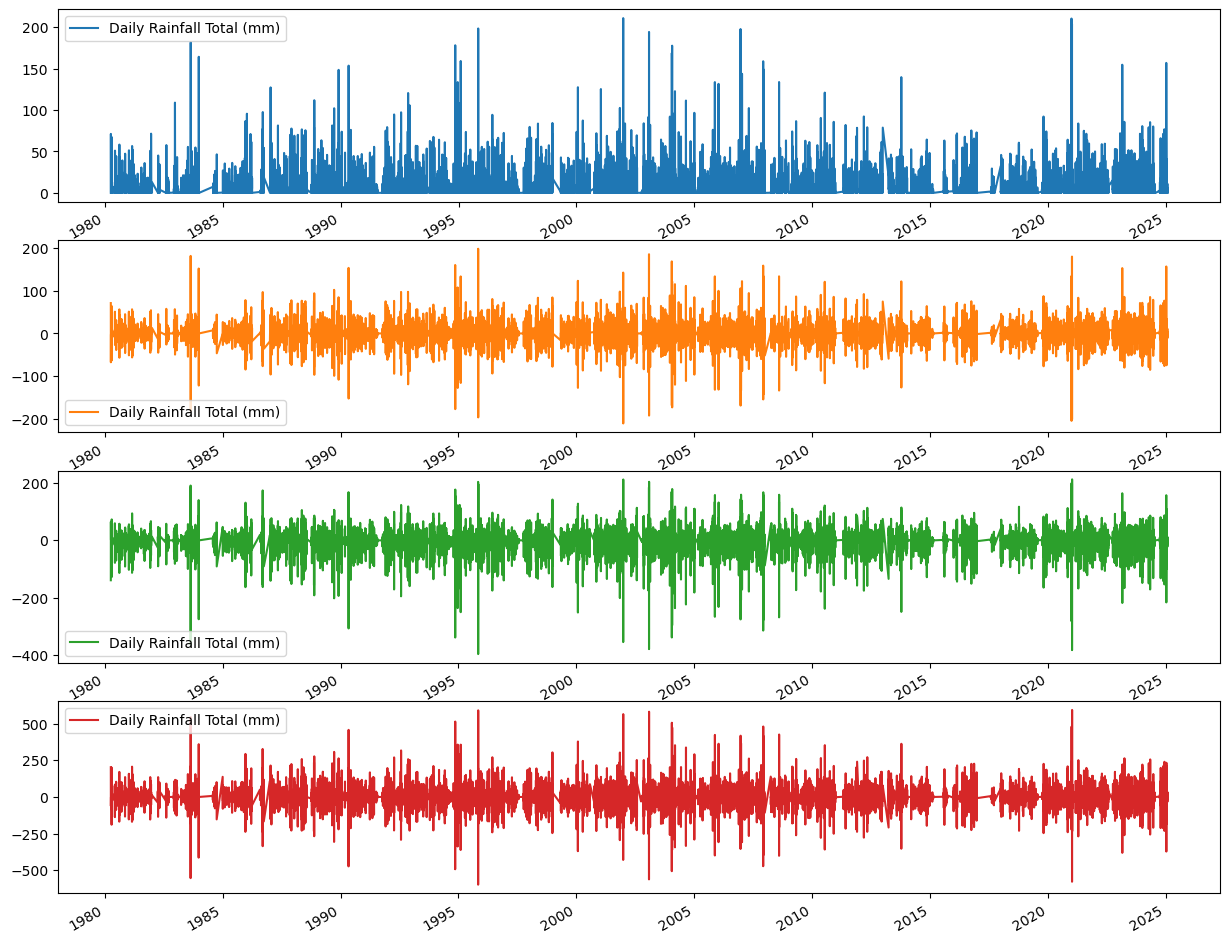

In [17]:
fig, ax = plt.subplots(4, 1, figsize=(15, 13))
df[['Daily Rainfall Total (mm)']].plot(ax=ax[0])
df[['Daily Rainfall Total (mm)']].diff().plot(ax=ax[1], c='C1')
df[['Daily Rainfall Total (mm)']].diff().diff().plot(ax=ax[2], c='C2')
df[['Daily Rainfall Total (mm)']].diff().diff().diff().plot(ax=ax[3], c='C3')
plt.show()

# Of course, these are just plots. Do the relevant test!

# End of example starter code. Have fun!

# Using Periodigram
to determine the power spectrum frequency components and remap the frequency axis to time period for better explainability

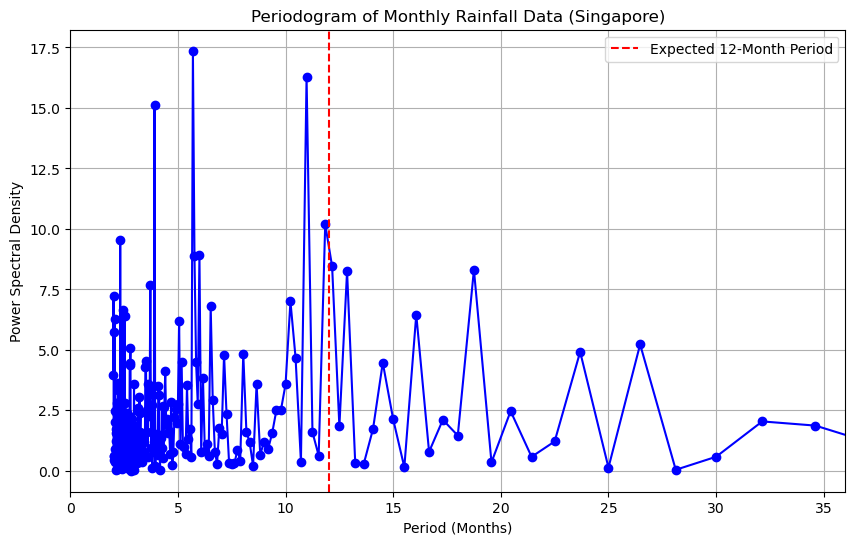

Dominant period: 5.70 months


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Load or create monthly rainfall data
monthly_rainfall = df_monthly[['Daily Rainfall Total (mm)']].dropna()

# Detrend the data to remove long-term trends
monthly_rainfall['rainfall_detrended'] = signal.detrend(monthly_rainfall['Daily Rainfall Total (mm)'])

# Compute the periodogram
fs = 12  # Sampling frequency: 12 samples per year (monthly)
freqs, power = signal.periodogram(monthly_rainfall['rainfall_detrended'], fs=fs)

# Convert frequencies to periods (in months), excluding freq=0
periods = 12 / freqs[1:]  # Skip the DC component (freq=0)
power = power[1:]  # Corresponding power values

# Plot the periodogram
plt.figure(figsize=(10, 6))
plt.plot(periods, power, marker='o', linestyle='-', color='b')
plt.xlabel('Period (Months)')
plt.ylabel('Power Spectral Density')
plt.title('Periodogram of Monthly Rainfall Data (Singapore)')
plt.grid(True)
plt.axvline(x=12, color='r', linestyle='--', label='Expected 12-Month Period')
plt.legend()
plt.xlim(0, 36)  # Focus on periods up to 36 months for clarity
plt.show()

# Identify the dominant period
dominant_period = periods[np.argmax(power)]
print(f"Dominant period: {dominant_period:.2f} months")

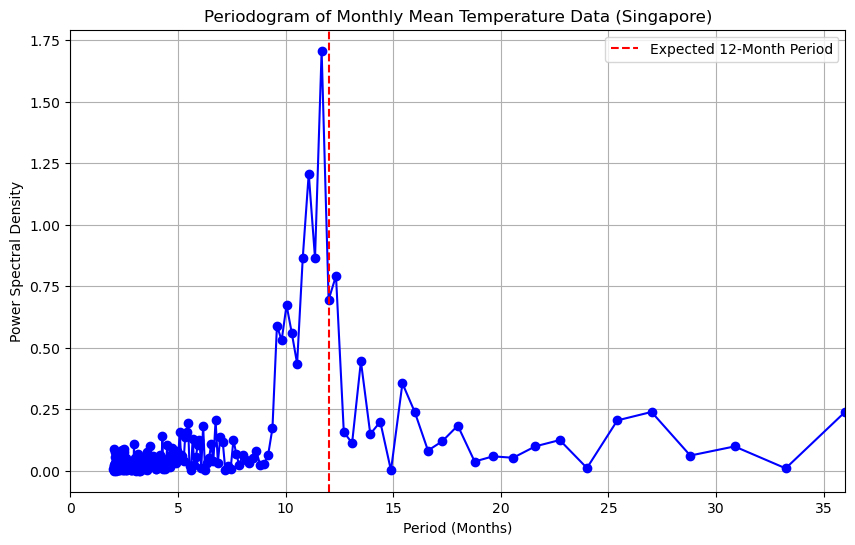

Dominant period: 11.68 months


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Load or create monthly rainfall data
monthly_temp = df_monthly[['Mean Temperature (°C)']].dropna()

# Detrend the data to remove long-term trends
monthly_temp['temp_detrended'] = signal.detrend(monthly_temp['Mean Temperature (°C)'])

# Compute the periodogram
fs = 12  # Sampling frequency: 12 samples per year (monthly)
freqs, power = signal.periodogram(monthly_temp['temp_detrended'], fs=fs)

# Convert frequencies to periods (in months), excluding freq=0
periods = 12 / freqs[1:]  # Skip the DC component (freq=0)
power = power[1:]  # Corresponding power values

# Plot the periodogram
plt.figure(figsize=(10, 6))
plt.plot(periods, power, marker='o', linestyle='-', color='b')
plt.xlabel('Period (Months)')
plt.ylabel('Power Spectral Density')
plt.title('Periodogram of Monthly Mean Temperature Data (Singapore)')
plt.grid(True)
plt.axvline(x=12, color='r', linestyle='--', label='Expected 12-Month Period')
plt.legend()
plt.xlim(0, 36)  # Focus on periods up to 36 months for clarity
plt.show()

# Identify the dominant period
dominant_period = periods[np.argmax(power)]
print(f"Dominant period: {dominant_period:.2f} months")

## Using period is 12 month or 365 days to do time decomposition

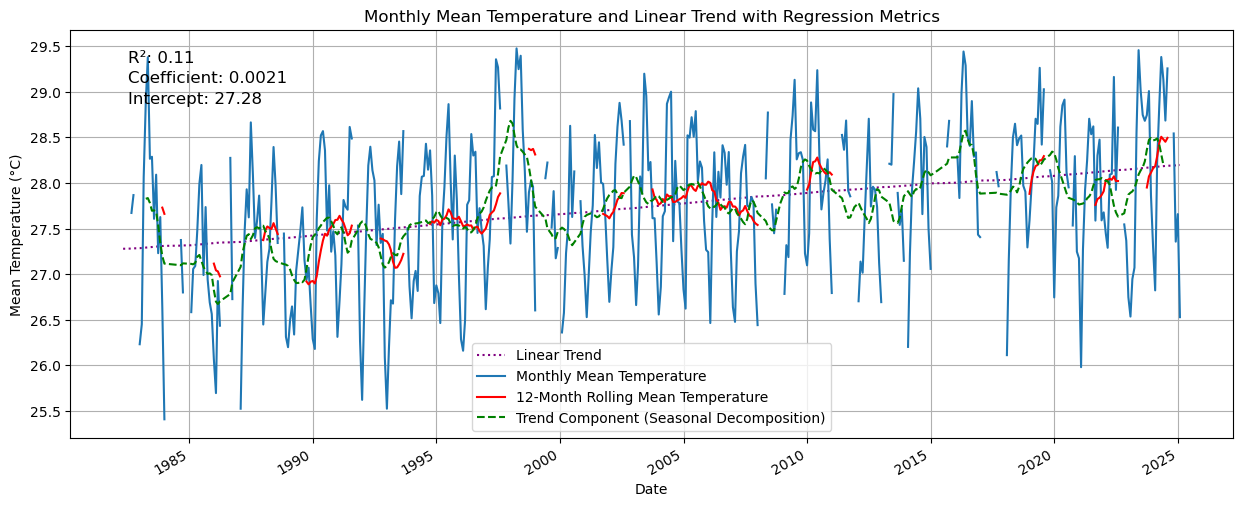

In [20]:
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt # Import matplotlib

plt.figure(figsize=(15, 6))

# Extract the linear trend
# Create a numerical representation of time
time_index = np.arange(len(df_monthly['Mean Temperature (°C)'].dropna()))
temperature_values = df_monthly['Mean Temperature (°C)'].dropna().values.reshape(-1, 1)

# Fit a linear regression model
model = LinearRegression()
model.fit(time_index.reshape(-1, 1), temperature_values)

# Predict the linear trend
linear_trend = model.predict(time_index.reshape(-1, 1))

# Calculate R-squared
r2 = r2_score(temperature_values, linear_trend)

# Get regression coefficients
intercept = model.intercept_[0]
coefficient = model.coef_[0][0]

# Plot the linear trend
plt.plot(df_monthly['Mean Temperature (°C)'].dropna().index, linear_trend, label='Linear Trend', color='purple', linestyle=':')

# Plot monthly temperature and monthly temperature with a rolling window of 12 months on the same plot.
df_monthly['Mean Temperature (°C)'].plot(label='Monthly Mean Temperature')
df_monthly['Mean Temperature (°C)'].rolling(window=12).mean().plot(label='12-Month Rolling Mean Temperature', color='red')

# Perform additive decomposition on monthly mean temperature data
meantemp_monthly_add = seasonal_decompose(df_monthly['Mean Temperature (°C)'].dropna(), model='additive', period=12)

# Plot the trend component from the decomposition
meantemp_monthly_add.trend.plot(label='Trend Component (Seasonal Decomposition)', color='green', linestyle='--')

# Add R2 and coefficients to the plot
plt.text(0.05, 0.95, f'R²: {r2:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(0.05, 0.90, f'Coefficient: {coefficient:.4f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(0.05, 0.85, f'Intercept: {intercept:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')


plt.title('Monthly Mean Temperature and Linear Trend with Regression Metrics') # Updated title
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

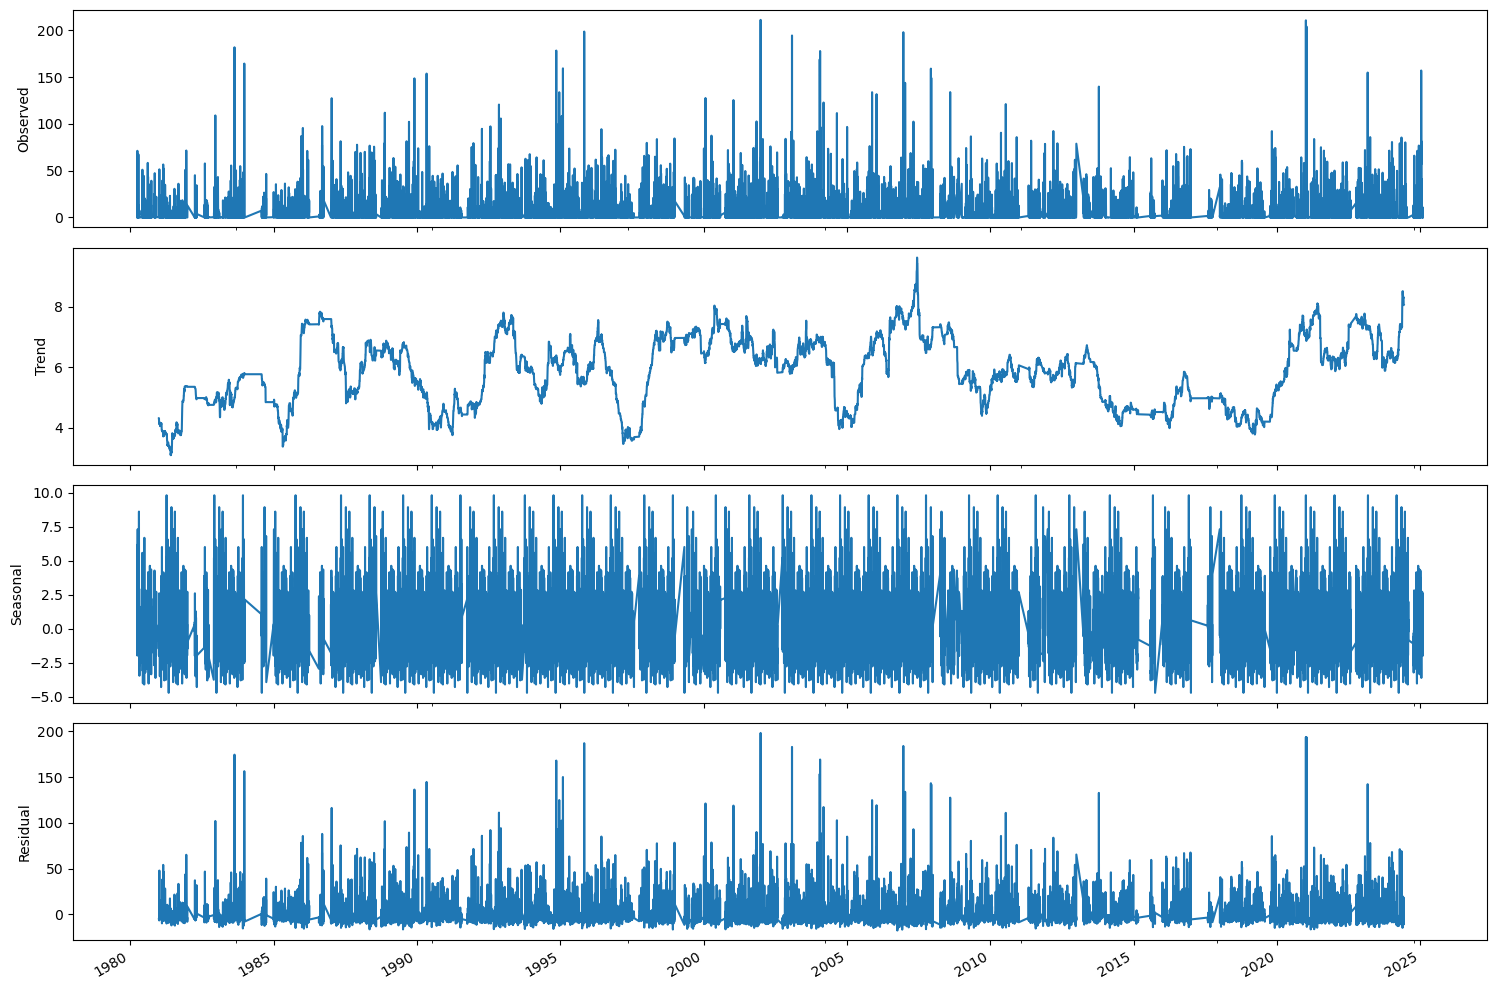

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
rainfall_add = seasonal_decompose(df['Daily Rainfall Total (mm)'].dropna(), model='additive', period=365)

# Plot the decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 10), sharex=True)
rainfall_add.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
rainfall_add.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
rainfall_add.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
rainfall_add.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.tight_layout()
plt.show()

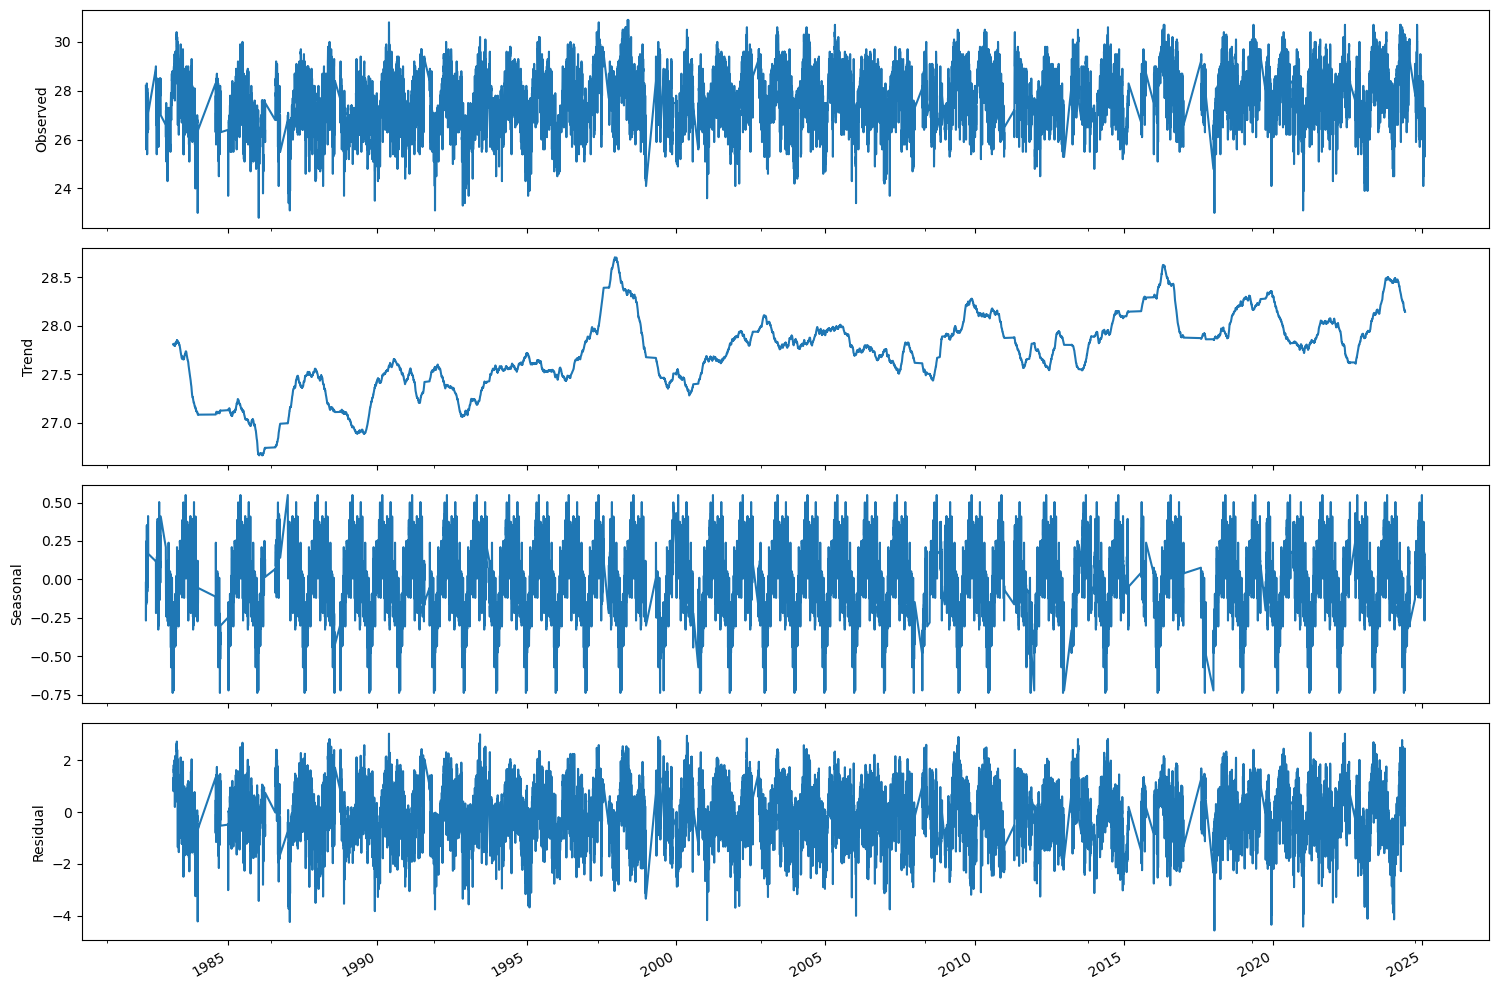

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
meantemp_add = seasonal_decompose(df['Mean Temperature (°C)'].dropna(), model='additive', period=365)

# Plot the decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 10), sharex=True)
meantemp_add.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
meantemp_add.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
meantemp_add.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
meantemp_add.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.tight_layout()
plt.show()

# For Montly Data

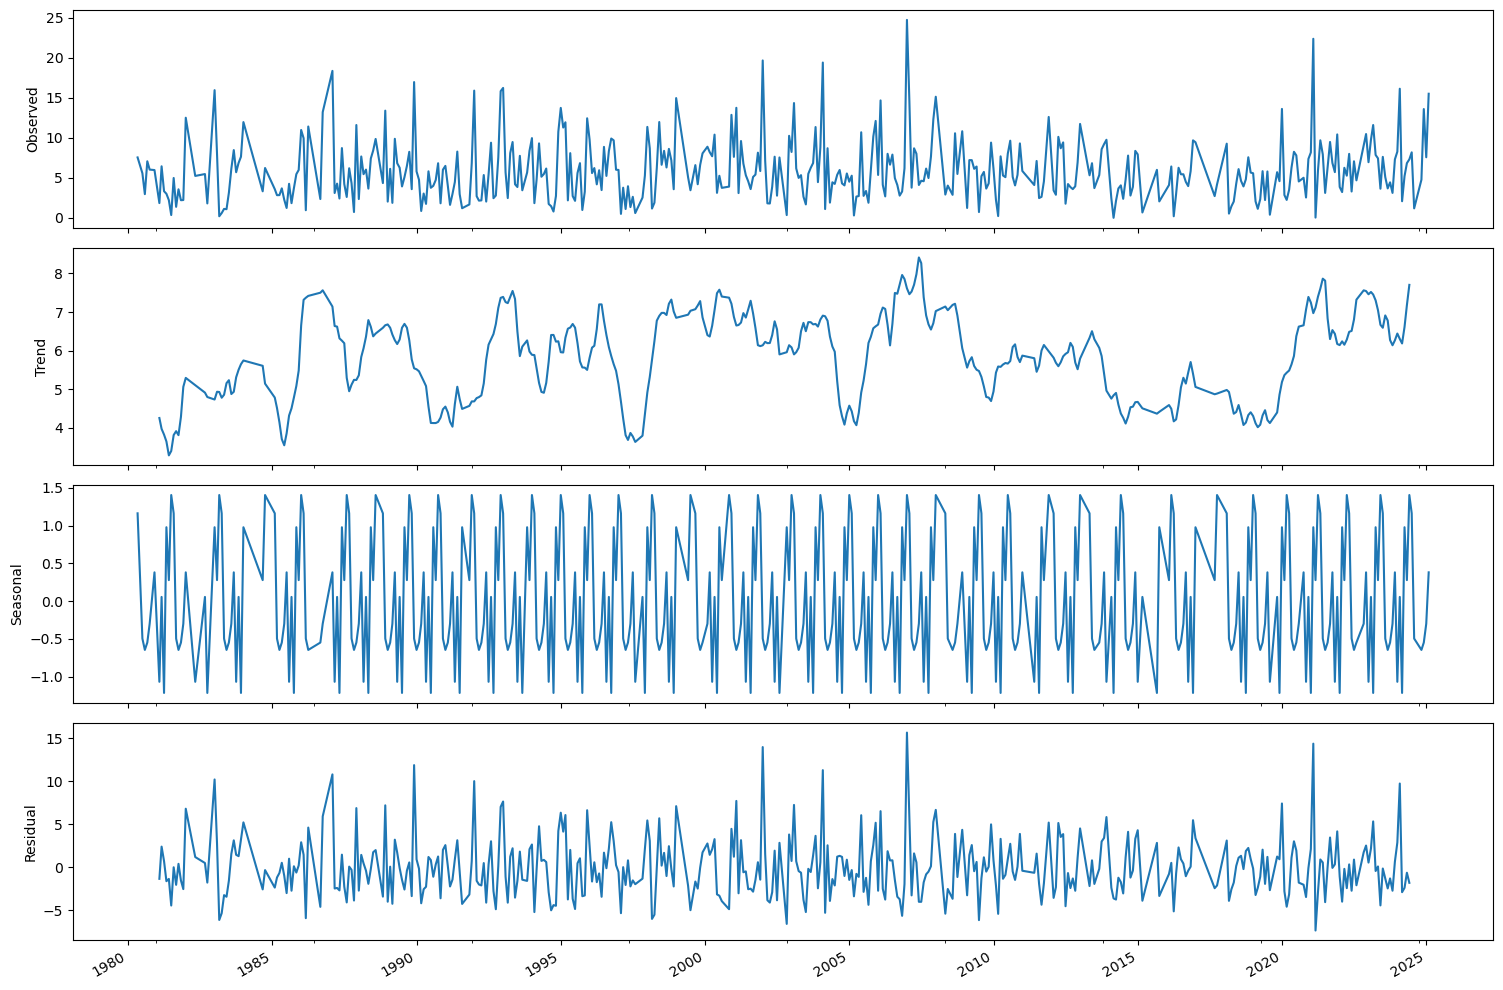

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition on monthly rainfall data
result_monthly_add = seasonal_decompose(df_monthly['Daily Rainfall Total (mm)'].dropna(), model='additive', period=12)

# Plot the decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 10), sharex=True)
result_monthly_add.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
result_monthly_add.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
result_monthly_add.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
result_monthly_add.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.tight_layout()
plt.show()



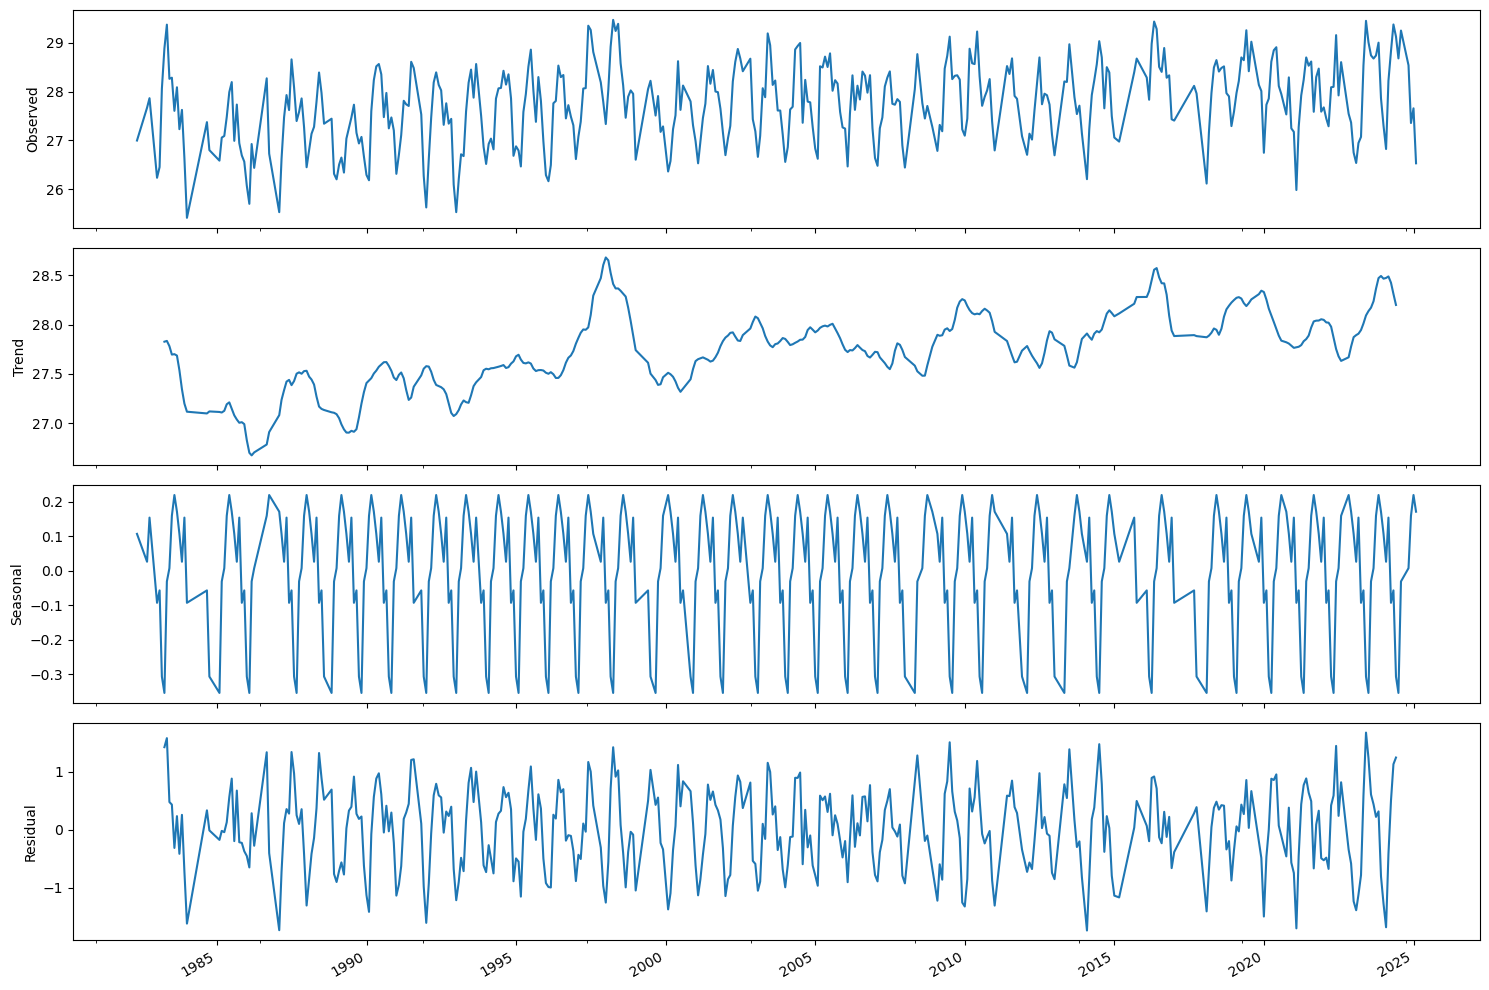

In [24]:

# Perform additive decomposition on monthly mean temperature data
meantemp_monthly_add = seasonal_decompose(df_monthly['Mean Temperature (°C)'].dropna(), model='additive', period=12)

# Plot the decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 10), sharex=True)
meantemp_monthly_add.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
meantemp_monthly_add.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
meantemp_monthly_add.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
meantemp_monthly_add.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.tight_layout()
plt.show()



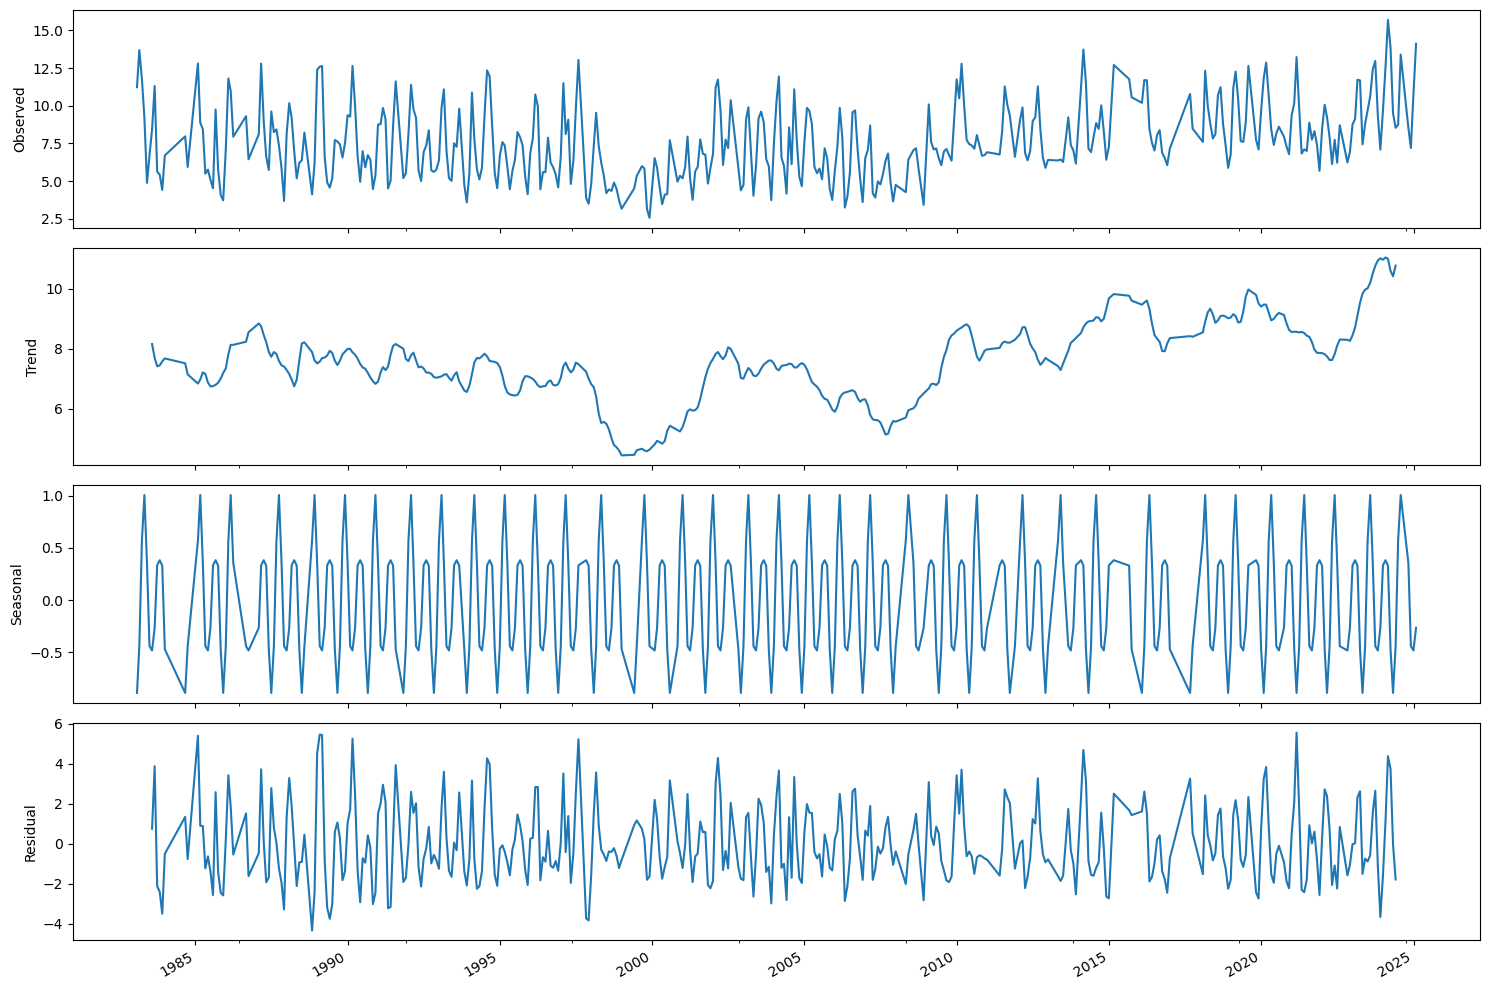

In [25]:

# Perform additive decomposition on monthly mean wind speed data
meanwind_monthly_add = seasonal_decompose(df_monthly['Mean Wind Speed (km/h)'].dropna(), model='additive', period=12)

# Plot the decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 10), sharex=True)
meanwind_monthly_add.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
meanwind_monthly_add.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
meanwind_monthly_add.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
meanwind_monthly_add.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.tight_layout()
plt.show()

### Observations
The monthly data is much less noisy and appears stationary enough after detrending and removing seasonality

# Modelling

In [26]:
#install FBprophet
# !pip install prophet

In [27]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Remove verbose logging
import logging
logging.getLogger("prophet").setLevel(logging.ERROR)
logging.getLogger("cmdstanpy").disabled=True

# Prepare the data for Prophet
# Prophet requires the dataframe to have columns 'ds' (datestamp) and 'y' (value)
# Using monthly mean temperature data
prophet_df = df_monthly[['Mean Temperature (°C)']].reset_index()
prophet_df = prophet_df.rename(columns={'index': 'ds', 'Mean Temperature (°C)': 'y'})

# Drop rows with NaN values in 'y'
prophet_df = prophet_df.dropna(subset=['y'])

# Initialize and fit the Prophet model
model = Prophet()
model.fit(prophet_df)

# Create a dataframe for future dates (12 months)
future = model.make_future_dataframe(periods=12, freq='ME')

# Make predictions
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
ax = fig.gca()
ax.set_title('Monthly Mean Temperature Forecast with Prophet')
ax.set_xlabel('Date')
ax.set_ylabel('Mean Temperature (°C)')
plt.show()

# Plot the components of the forecast
fig2 = model.plot_components(forecast)
plt.show()

ModuleNotFoundError: No module named 'prophet'

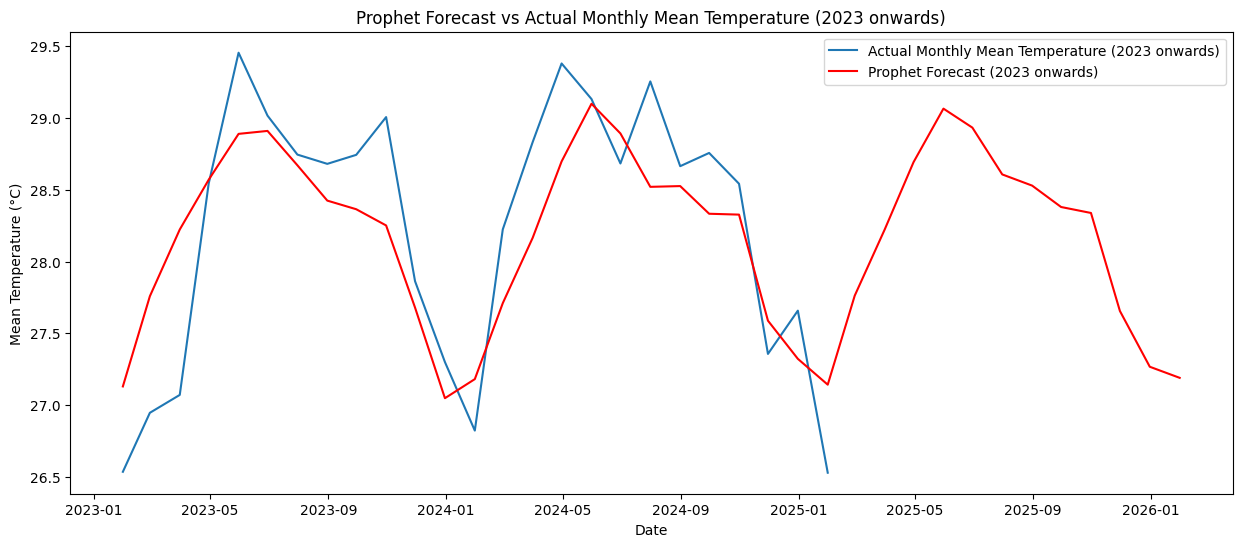

In [ ]:
# Plot the Prophet forecast and actual data from 2023 onwards
plt.figure(figsize=(15, 6))
plt.plot(df_monthly['Mean Temperature (°C)'].dropna()['2023':], label='Actual Monthly Mean Temperature (2023 onwards)')
plt.plot(forecast.set_index('ds')['yhat']['2023':], label='Prophet Forecast (2023 onwards)', color='red')
plt.title('Prophet Forecast vs Actual Monthly Mean Temperature (2023 onwards)')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.legend()
plt.show()

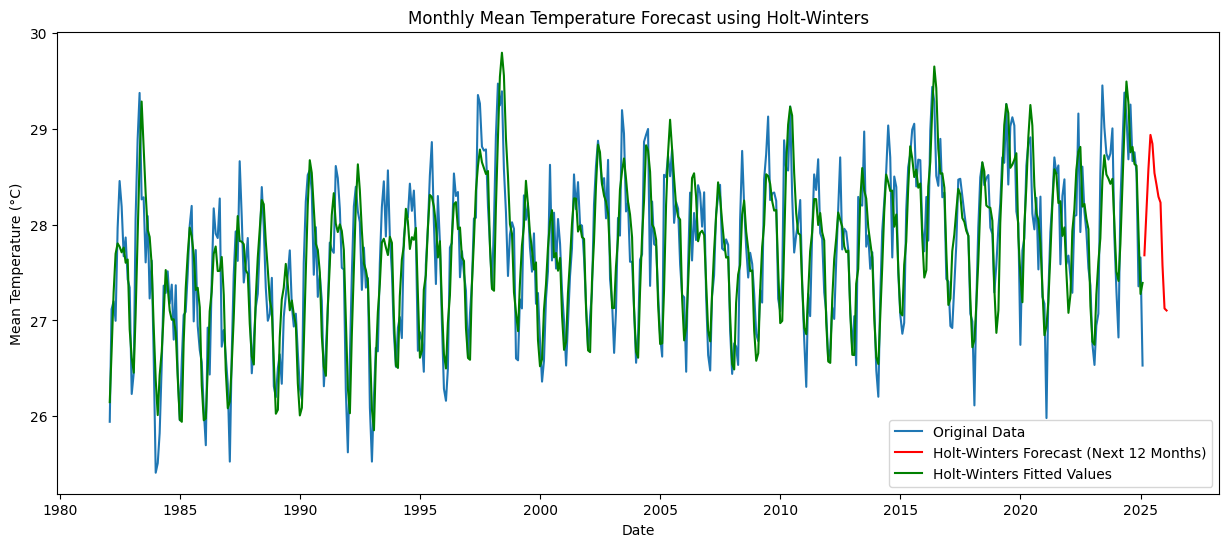

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Apply Holt-Winters method to monthly mean temperature data
# Using additive trend and additive seasonality with a period of 12 months (for yearly seasonality in monthly data)
model_holt = ExponentialSmoothing(df_monthly['Mean Temperature (°C)'].dropna(),
                                  seasonal_periods=12,  # Changed to 12 for monthly data
                                  trend='add',
                                  seasonal='add')

# Fit the model
fit_holt = model_holt.fit()

# Make predictions for the next 12 months
forecast_holt = fit_holt.forecast(12)  # Changed to 12 for monthly data

# Plot the original data and the forecast
plt.figure(figsize=(15, 6))
plt.plot(df_monthly['Mean Temperature (°C)'].dropna(), label='Original Data')
plt.plot(forecast_holt, label='Holt-Winters Forecast (Next 12 Months)', color='red')
plt.plot(fit_holt.fittedvalues, label='Holt-Winters Fitted Values', color='green') # Added fitted values
plt.title('Monthly Mean Temperature Forecast using Holt-Winters')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.legend()
plt.show()

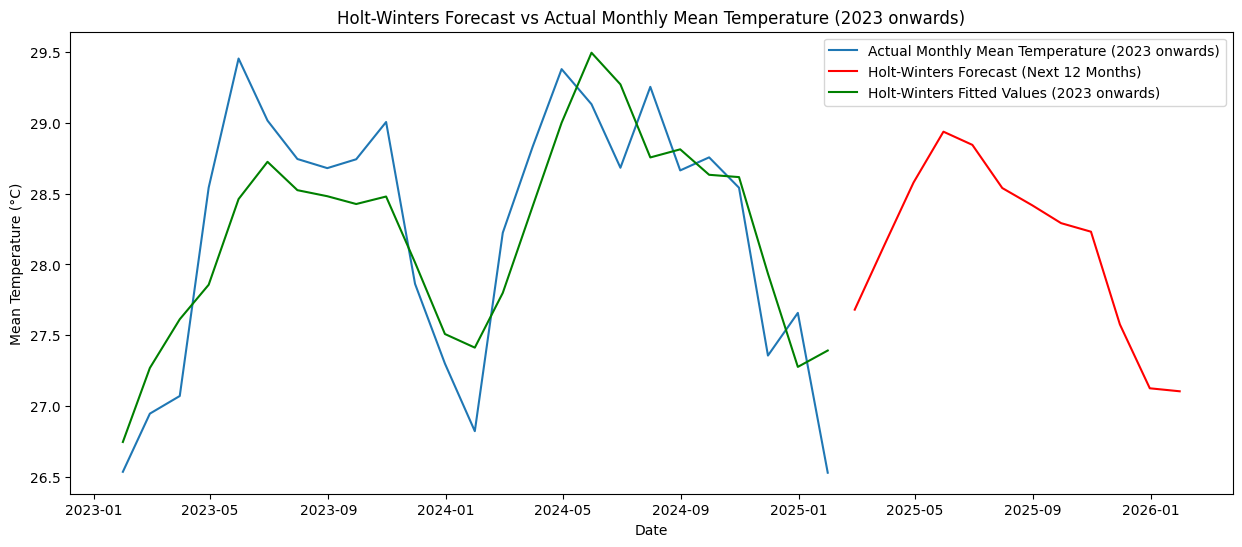

In [ ]:
# Plot the Holt-Winters forecast and actual data from 2023 onwards
plt.figure(figsize=(15, 6))
plt.plot(df_monthly['Mean Temperature (°C)'].dropna()['2023':], label='Actual Monthly Mean Temperature (2023 onwards)')
plt.plot(forecast_holt, label='Holt-Winters Forecast (Next 12 Months)', color='red')
plt.plot(fit_holt.fittedvalues['2023':], label='Holt-Winters Fitted Values (2023 onwards)', color='green') # Added fitted values from 2023 onwards
plt.title('Holt-Winters Forecast vs Actual Monthly Mean Temperature (2023 onwards)')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.legend()
plt.show()

Model and Evaluate with FB Prophet

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Prepare the data for Prophet (using df_monthly)
prophet_df_monthly = df_monthly['Mean Temperature (°C)'].reset_index()
prophet_df_monthly = prophet_df_monthly.rename(columns={'index': 'ds', 'Mean Temperature (°C)': 'y'})
prophet_df_monthly = prophet_df_monthly.dropna(subset=['y'])

# Determine the split point (last year)
# Assuming monthly data, so split is 12 months ago
split_date = prophet_df_monthly['ds'].max() - pd.DateOffset(months=12)

# Split data into training and testing sets
train_df = prophet_df_monthly[prophet_df_monthly['ds'] <= split_date]
test_df = prophet_df_monthly[prophet_df_monthly['ds'] > split_date]

# Initialize and fit the Prophet model on the training data
model = Prophet()
model.fit(train_df)

# Make predictions on the training set
train_forecast = model.predict(train_df[['ds']])

# Make predictions on the testing set
test_forecast = model.predict(test_df[['ds']])

# Calculate RMSE for the training set
rmse_train = np.sqrt(mean_squared_error(train_df['y'], train_forecast['yhat']))

# Calculate RMSE for the testing set
rmse_test = np.sqrt(mean_squared_error(test_df['y'], test_forecast['yhat']))

print(f'RMSE for training set: {rmse_train:.2f}')
print(f'RMSE for testing set: {rmse_test:.2f}')

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8jn711v_/29ninrdv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8jn711v_/l259sg9o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64915', 'data', 'file=/tmp/tmp8jn711v_/29ninrdv.json', 'init=/tmp/tmp8jn711v_/l259sg9o.json', 'output', 'file=/tmp/tmp8jn711v_/prophet_modelolw5vceq/prophet_model-20250802143955.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:39:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:39:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE for training set: 0.46
RMSE for testing set: 0.54


## Model and Evaluate with Holt-Winters

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import numpy as np

# Prepare the data for Holt-Winters (using df_monthly)
holt_df_monthly = df_monthly['Mean Temperature (°C)'].dropna()

# Determine the split point (last year)
# Assuming monthly data, so split is 12 months ago
split_date = holt_df_monthly.index.max() - pd.DateOffset(months=12)

# Split data into training and testing sets
train_data = holt_df_monthly[holt_df_monthly.index <= split_date]
test_data = holt_df_monthly[holt_df_monthly.index > split_date]

# Apply Holt-Winters method to the training data
# Using additive trend and additive seasonality with a period of 12 months
model_holt = ExponentialSmoothing(train_data,
                                  seasonal_periods=12,  # Changed to 12 for monthly data
                                  trend='add',
                                  seasonal='add')

# Fit the model
fit_holt = model_holt.fit()

# Make predictions on the training set (in-sample predictions)
train_forecast_holt = fit_holt.predict(start=train_data.index[0], end=train_data.index[-1])

# Make predictions on the testing set (out-of-sample predictions)
test_forecast_holt = fit_holt.predict(start=test_data.index[0], end=test_data.index[-1])


# Calculate RMSE for the training set
# Align the indices for RMSE calculation
train_data_aligned, train_forecast_holt_aligned = train_data.align(train_forecast_holt, join='inner')
rmse_train_holt = np.sqrt(mean_squared_error(train_data_aligned, train_forecast_holt_aligned))

# Calculate RMSE for the testing set
# Align the indices for RMSE calculation
test_data_aligned, test_forecast_holt_aligned = test_data.align(test_forecast_holt, join='inner')
rmse_test_holt = np.sqrt(mean_squared_error(test_data_aligned, test_forecast_holt_aligned))


print(f'RMSE for training set (Holt-Winters): {rmse_train_holt:.2f}')
print(f'RMSE for testing set (Holt-Winters): {rmse_test_holt:.2f}')

RMSE for training set (Holt-Winters): 0.41
RMSE for testing set (Holt-Winters): 0.46
